In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams13.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,SVM
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,SVM
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,SVM
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,SVM
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,SVM


In [3]:
len(df)

17544

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              17544 non-null  int64  
 1   N_Person           17544 non-null  int64  
 2   Xcenter            17544 non-null  float64
 3   Ycenter            17544 non-null  float64
 4   PerXmin            17544 non-null  float64
 5   PerYmin            17544 non-null  float64
 6   PerXmax            17544 non-null  float64
 7   PerYmax            17544 non-null  float64
 8   N_Handgun          17544 non-null  int64  
 9   HgXcenter          17544 non-null  float64
 10  HgYcenter          17544 non-null  float64
 11  HgXmin             17544 non-null  float64
 12  HgYmin             17544 non-null  float64
 13  HgXmax             17544 non-null  float64
 14  HgYmax             17544 non-null  float64
 15  Intersection       17544 non-null  object 
 16  Included_Center    175

In [5]:
df.nunique()

Frame                 1933
N_Person                 4
Xcenter              13726
Ycenter              13707
PerXmin              13734
PerYmin              13732
PerXmax              13734
PerYmax              13712
N_Handgun                5
HgXcenter             7251
HgYcenter             7249
HgXmin                7253
HgYmin                7253
HgXmax                7253
HgYmax                7252
Intersection             9
Included_Center          2
Intersection_Area     7611
Hg_Area               7253
Distance             17544
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

1    11993
0     5551
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,SVM,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,SVM,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,SVM,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,SVM,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,SVM,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17544 non-null  int64  
 1   N_Person                      17544 non-null  int64  
 2   Xcenter                       17544 non-null  float64
 3   Ycenter                       17544 non-null  float64
 4   PerXmin                       17544 non-null  float64
 5   PerYmin                       17544 non-null  float64
 6   PerXmax                       17544 non-null  float64
 7   PerYmax                       17544 non-null  float64
 8   N_Handgun                     17544 non-null  int64  
 9   HgXcenter                     17544 non-null  float64
 10  HgYcenter                     17544 non-null  float64
 11  HgXmin                        17544 non-null  float64
 12  HgYmin                        17544 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'SVM', 0: 'RFC'}


In [10]:
print(df2['Ground_Truth'].value_counts())

1    11993
0     5551
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17544 non-null  int64  
 1   N_Person                      17544 non-null  int64  
 2   Xcenter                       17544 non-null  float64
 3   Ycenter                       17544 non-null  float64
 4   PerXmin                       17544 non-null  float64
 5   PerYmin                       17544 non-null  float64
 6   PerXmax                       17544 non-null  float64
 7   PerYmax                       17544 non-null  float64
 8   N_Handgun                     17544 non-null  int64  
 9   HgXcenter                     17544 non-null  float64
 10  HgYcenter                     17544 non-null  float64
 11  HgXmin                        17544 non-null  float64
 12  HgYmin                        17544 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14035, 28) (14035,)
(3509, 28) (3509,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9787752523283665
mean_test =  0.9778405756488437


,fit_time,score_time,test_score,train_score
0,0.088759,0.001995,0.973647,0.974349
1,0.086771,0.002988,0.986467,0.977911
2,0.087733,0.002992,0.980769,0.978941
3,0.085801,0.002987,0.984330,0.978466
4,0.087770,0.002986,0.971510,0.980207
5,0.086771,0.001990,0.973628,0.978942
6,0.087769,0.002988,0.980756,0.980051
7,0.087773,0.001987,0.978617,0.980842
8,0.086735,0.003015,0.970064,0.979180
9,0.087766,0.002963,0.978617,0.978863


                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
20     Intersection_Center_right    0.000000  0.000000
7                        PerYmax    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
15               Included_Center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
1                       N_Person    0.000182  0.000544
9                      HgXcenter    0.000964  0.001483
23           Intersection_Inside    0.001464  0.002928
17                       Hg_Area    0.002755  0.004909
0                          Frame    0.003270  0.009461
11                        HgXmin    0.008861  0.025076
13                        HgXmax    0.010426  0.026530
25        Intersection_Up_center    0.011081  0.019206
18                      Distance    0.012826  0.022383
19      In

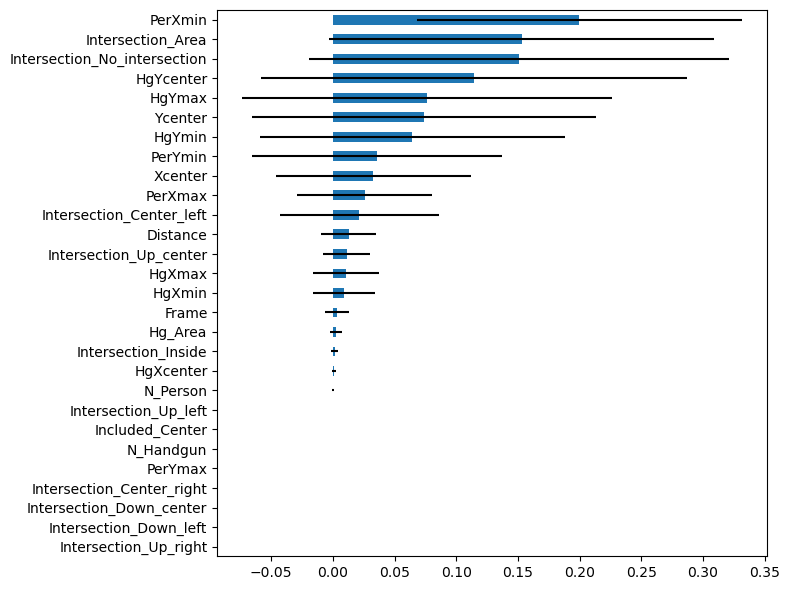

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1117
           1       0.99      0.98      0.99      2392

    accuracy                           0.98      3509
   macro avg       0.98      0.98      0.98      3509
weighted avg       0.98      0.98      0.98      3509



In [17]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17544 non-null  int64  
 1   N_Person                      17544 non-null  int64  
 2   Xcenter                       17544 non-null  float64
 3   Ycenter                       17544 non-null  float64
 4   PerXmin                       17544 non-null  float64
 5   PerYmin                       17544 non-null  float64
 6   PerXmax                       17544 non-null  float64
 7   PerYmax                       17544 non-null  float64
 8   N_Handgun                     17544 non-null  int64  
 9   HgXcenter                     17544 non-null  float64
 10  HgYcenter                     17544 non-null  float64
 11  HgXmin                        17544 non-null  float64
 12  HgYmin                        17544 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.83658117e+00, -1.00999824e+00,  3.96637548e-01,
        -1.04831006e+00,  4.12372041e-01, -7.99690393e-01,
         3.65404513e-01, -1.40016677e+00, -4.92920518e-01,
         6.93758180e-01, -1.24796189e+00,  7.44516211e-01,
        -1.17204959e+00,  6.41351249e-01, -1.31948698e+00,
         1.21888884e+00, -4.43181062e-03, -6.27822005e-01,
        -7.39894022e-01,  2.83442862e+00, -2.77928514e-01,
        -1.68842817e-02, -1.06776442e-02, -5.28819336e-01,
        -1.14253562e+00, -1.22409519e-01, -5.95525396e-02,
        -1.19743791e-01],
       [-1.83443539e+00, -1.00999824e+00,  3.96354965e-01,
        -1.04772367e+00,  4.11402739e-01, -7.98005839e-01,
         3.65846737e-01, -1.40288405e+00, -4.92920518e-01,
         6.92149159e-01, -1.24881230e+00,  7.41492404e-01,
        -1.17269923e+00,  6.41148246e-01, -1.32053981e+00,
         1.21888884e+00, -1.88947891e-03, -6.21626149e-01,
        -7.38471427e-01,  2.83442862e+00, -2.77928514e-01,
        -1.68842817e-02, -1.06

In [21]:
print(scaler.mean_)

[8.55903899e+02 8.83435933e-01 3.89929273e+02 3.82198064e+02
 3.03508454e+02 2.46115199e+02 4.76350091e+02 5.18280928e+02
 2.94744642e-01 3.04695345e+02 3.11905472e+02 2.81557956e+02
 2.92624884e+02 3.27832734e+02 3.31186061e+02 4.02302782e-01
 8.51946248e+02 1.96427034e+03 2.38237073e+02 1.10693114e-01
 7.17054264e-02 2.84997720e-04 1.13999088e-04 2.18536252e-01
 5.66233470e-01 1.47628819e-02 3.53397173e-03 1.41358869e-02]


In [22]:
print(scaler.scale_)

[4.66031075e+02 8.74690567e-01 2.14478378e+02 6.92687398e+01
 2.22781342e+02 1.12184008e+02 2.14205235e+02 3.96508195e+01
 5.97955718e-01 1.51618599e+02 9.76452203e+01 1.51113455e+02
 9.94064652e+01 1.52594807e+02 9.64054386e+01 4.90362370e-01
 1.58423969e+03 1.72463232e+03 1.38014604e+02 3.13751731e-01
 2.57999531e-01 1.68794697e-02 1.06764269e-02 4.13253141e-01
 4.95593712e-01 1.20602401e-01 5.93420826e-02 1.18051106e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13158, 28)

In [25]:
y_train.value_counts()

1    8995
0    4163
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4386, 28)

In [27]:
y_test.value_counts()

1    2998
0    1388
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[1.89135950e-08, 9.99999981e-01],
       [1.30262816e-08, 9.99999987e-01],
       [9.99999999e-01, 8.90171465e-10],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999992e-01, 7.99002928e-09]])

In [29]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1388
           1       1.00      1.00      1.00      2998

    accuracy                           0.99      4386
   macro avg       0.99      0.99      0.99      4386
weighted avg       0.99      0.99      0.99      4386



In [32]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9957440340477276
Score test =  0.9947560419516643


In [30]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 